> ## PROBLEM STATEMENT : 
> The management team of the company wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [32]:
df = pd.read_csv('retail_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


> ## BASIC OBSERVATION

In [33]:
df.shape

(550068, 10)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [35]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [36]:
df.describe(include= object)

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [37]:
5023/9263 ##std_dev is above 50% of the mean value.

0.542264924970312

* from the describe() function it can be seen that the spread in Purchase column is pretty huge from 12.0 to value like 23961.0. Now regarding outliers lets do a little calculations. Mainly because the std dev is 5023 where the mean is 9263 ie. the std dev is above 50% of the mean value.
* We can see very easilly that there are total of 550068 and also non null rows numbers are 550068. So, basiclly there are NO Null Values.

Now, lets look at the Outliers. Here we are gonna assume that the values which are (1.5 IQR) above 75th Percentile and (1.5 IQR) below 25th Percentile are the Outliers.

In [38]:
IQR_Purchase = 12054.0 - 5823.0
df['Purchase'][(df['Purchase'] >= (12054.0 + 1.5 * IQR_Purchase)) | (df['Purchase'] < (5823.0 -1.5 * IQR_Purchase))].sort_values(ascending=True)

195524    21401
38050     21401
242742    21401
30222     21402
354885    21404
          ...  
292083    23960
321782    23960
93016     23961
370891    23961
87440     23961
Name: Purchase, Length: 2677, dtype: int64

In [39]:
outlier_percentage = 2677/ df.shape[0] 
outlier_percentage

0.004866671029763593

So, there are very less of 0.5% outliers present in the data. Thus a large These basically make the whole distributio very spreaded.

> ## UNIQUE ATTRIBUTES

In [40]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [41]:
df_columns = df.columns
unique_values_no = [df[column].nunique() for column in df.columns]
uniques_df = pd.DataFrame({'column':df_columns,
                    'unique_values_no':unique_values_no})
uniques_df.set_index('column')

,unique_values_no
column,
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category,20


Now, Gender, City_Category and Marital_Status and Product Category columns will be more hepful as categorical data than as object typr or integer type; so converting them into categorical variable will be more memory efficient.

In [42]:
cat_var = ['Gender', 'City_Category', 'Marital_Status', 'Product_Category']
for var in cat_var:
    df[var] = df[var].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  object  
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  object  
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(4), int64(3), object(3)
memory usage: 27.3+ MB


In [43]:
df['Gender'].value_counts() / len(df)

M    0.753105
F    0.246895
Name: Gender, dtype: float64

So, Male customer in the dataset is 75.3 % and female customer is 24.7 % . So, this dataset is basically a sample dataset and as mentioned in the population dataset its mentioned that there is 50 million male and 50 million female are there. So, we are gonna extrapolate for the population data from this sample analysis. 

In [45]:
df_male = df.loc[df['Gender'] == 'M']
df_female = df.loc[df['Gender'] == 'F']

#### DATASET MEAN THROUGH CLT AND CI FOR MALE

#### `UDF for a Single Trial Taking Multiple Sample Size `

In [106]:
def multi_size(dataframe) :
    global mean_list
    mean_list = []

    global size_list
    size_list = []

    for sample_size in range(100,100000,100):
        sample_mean = dataframe['Purchase'].sample(sample_size).mean()
        size_list.append(sample_size)
        mean_list.append(sample_mean)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


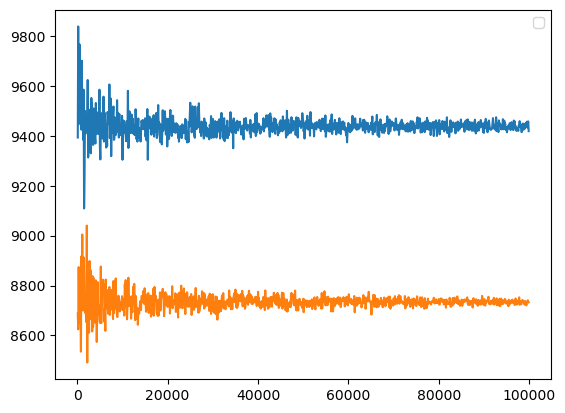

In [ ]:
multi_size(df_male)
fig1 = plt.plot(size_list, mean_list)
multi_size(df_female)
fig2 = plt.plot(size_list, mean_list)
plt.legend()

Sample mean is converging to approximately 9440 for MALE and to 8750 for FEMALE. So, we get an idea that the mean of the population is somewhere around 9440 for MALE and 8750 for FEMALE. Now, lets see the distribution for a particular sample size of lets say 50000.

#### `UDF for Multiple Trial Keeping the Sample Size Constant`

In [ ]:
def multi_trial(dataframe):
    size = 5000

    global list_mean
    list_mean = []

    for trial in range(10000):
        mean_sample = dataframe['Purchase'].sample(size).mean()
        list_mean.append(mean_sample)
   

#### **FEMALE**

<AxesSubplot:ylabel='Count'>

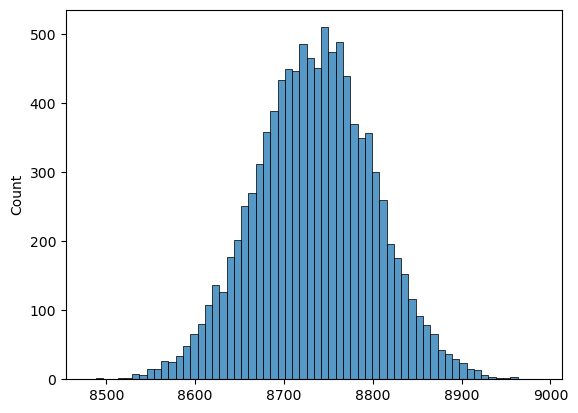

In [73]:
multi_trial(df_female)
sns.histplot(x = list_mean)

In [74]:
dataset_mean = np.mean(list_mean)
dataset_std_dev = np.std(list_mean)
print('dataset_mean = ',dataset_mean,'\n','dataset_standard_deviation = ',dataset_std_dev)

dataset_mean =  8734.02035908 
 dataset_standard_deviation =  66.4740105742961


#### `UDF for Confidence Inerval`

In [83]:

def CI(percent, dataset_mean, std_error) : 
    from scipy.stats import norm
    l = ((100 - percent)/2) / 100
    r = (percent + (100 - percent)/2) / 100
    left_factor = norm.ppf(l)
    right_factor = norm.ppf(r)

    ## limits
    left = dataset_mean + left_factor * std_error
    right = dataset_mean + right_factor * std_error
    
    return f'So, the {percent} % Confidence Interval is [{round(left,2), round(right,2)}]'

#### 95% Confidence Interval

In [75]:
CI(95,dataset_mean,dataset_std_dev )

'So, the Confidence Interval is [(8603.73, 8864.31)]'

### **MALE**

<AxesSubplot:ylabel='Count'>

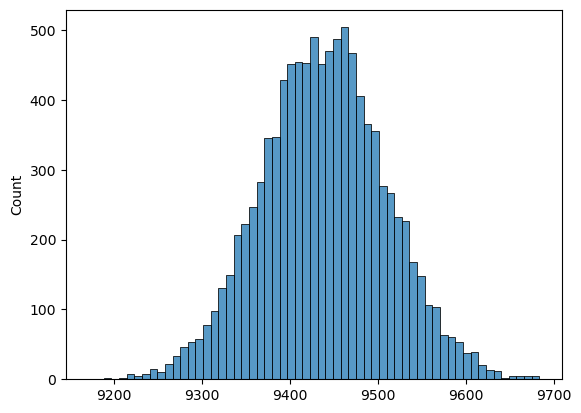

In [77]:
multi_trial(df_male)
sns.histplot(x = list_mean)

Thus, CLT is verified, we can see that, mean of different samples basically forms a Gaussian Curve. The mean of these curves represent the mean of the Population.

In [78]:
dataset_mean = np.mean(list_mean)
dataset_std_dev = np.std(list_mean)
print('dataset_mean = ',dataset_mean,'\n','dataset_standard_deviation = ',dataset_std_dev)

dataset_mean =  9438.63261134 
 dataset_standard_deviation =  70.94432274391578


#### 95% Confidence Interval

In [79]:
CI(95, dataset_mean, dataset_std_dev )

'So, the Confidence Interval is [(9299.58, 9577.68)]'

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

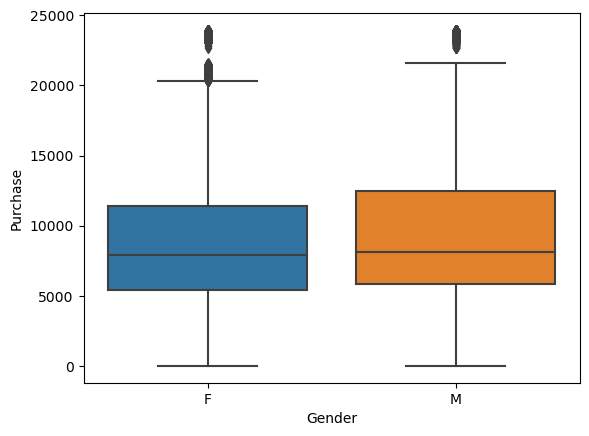

In [ ]:
sns.boxplot(y = df['Purchase'], x = df['Gender'])

So, the population mean will lie in between Confidence Interval with probability 95 %. These Analysis is showing that femalses are spending a bit less in general, though there are more outliers in females than male.  

> ## **AGE**

In [ ]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

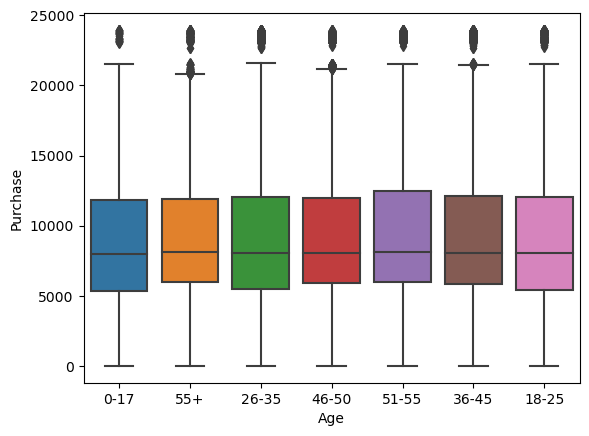

In [56]:
sns.boxplot(y=df['Purchase'], x=df['Age'])

So, it's cleared that for 26 to 35 age bin, the purchase count is highest. For below 18 and above 50 the count is on the low side.

> ### **OCUPATION**

In [47]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [51]:
df['Occupation'] = df['Occupation'].astype('str')

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

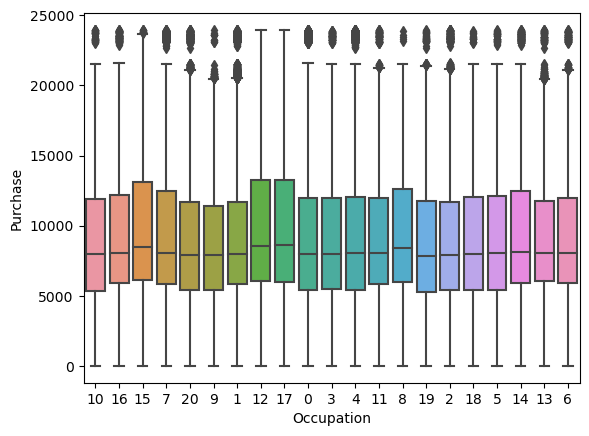

In [55]:
sns.boxplot(y = df['Purchase'], x = df['Occupation'])

So, for all the Occupations recorded in the dataset, the amount of Purchase is pretty much same. Though, for few occupations like 15, 12, 17  and then 8 and 14, there are quite a few examples of high expenditure.

> ### **CITY_CATEGORY**


<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

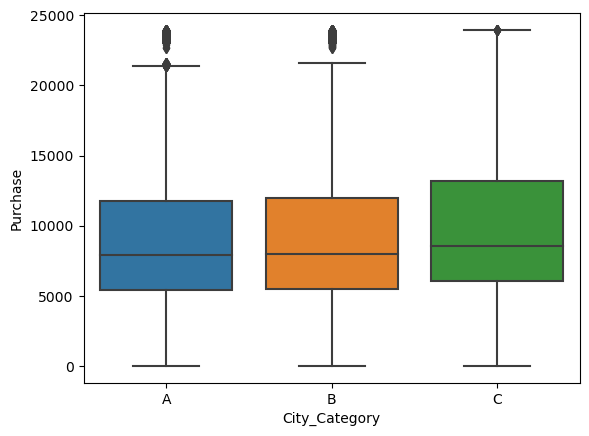

In [59]:
sns.boxplot(y = df['Purchase'], x=df['City_Category'])

In [65]:
df_a = df.loc[df['City_Category'] == 'A']
df_b = df.loc[df['City_Category'] == 'B']
df_c = df.loc[df['City_Category'] == 'C']

<AxesSubplot:ylabel='Count'>

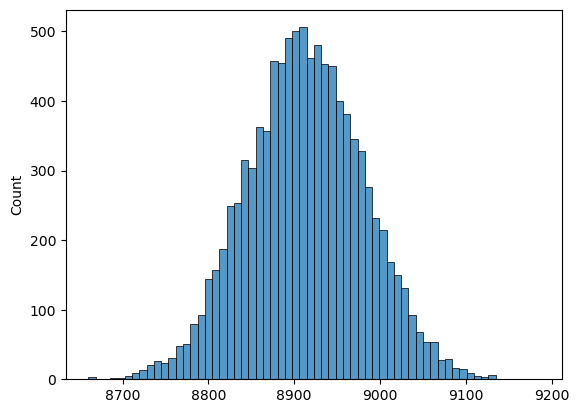

In [81]:
multi_trial(df_a)
sns.histplot(list_mean)

#### Confidence Interval

In [84]:
data_mean = np.mean(list_mean)
data_std = np.std(list_mean)
print('data_mean = ',data_mean,'\n','data_std = ',data_std)
CI(95,data_mean,data_std)

data_mean =  8912.703637580002 
 data_std =  68.35839705005618


'So, the 95 % Confidence Interval is [(8778.72, 9046.68)]'

In [85]:
CI(99, data_mean, data_std)

'So, the 99 % Confidence Interval is [(8736.62, 9088.78)]'

In [87]:
CI(80, data_mean, data_std)

'So, the 80 % Confidence Interval is [(8825.1, 9000.31)]'

<AxesSubplot:ylabel='Count'>

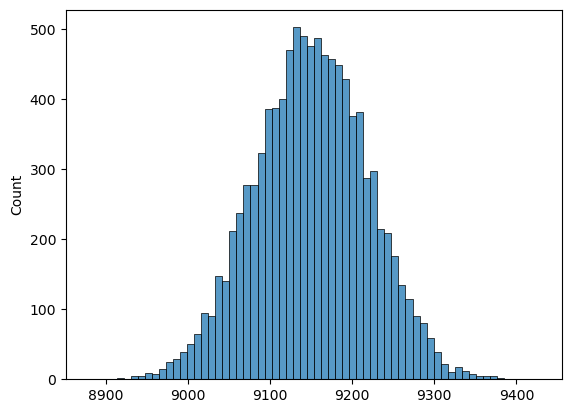

In [88]:
multi_trial(df_b)
sns.histplot(list_mean)

#### Confidence Interval

In [91]:
data_mean = np.mean(list_mean)
data_std = np.std(list_mean)
print('data_mean = ',data_mean,'\n','data_std = ',data_std)
CI(95,data_mean,data_std)

data_mean =  9150.41903578 
 data_std =  68.67293485544194


'So, the 95 % Confidence Interval is [(9015.82, 9285.02)]'

<AxesSubplot:ylabel='Count'>

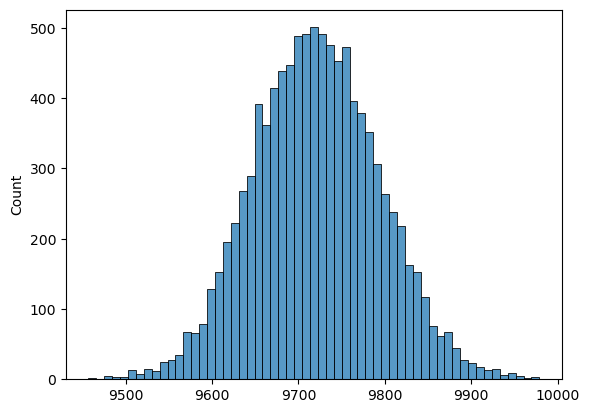

In [92]:
multi_trial(df_c)
sns.histplot(list_mean)

#### Confidence Interval

In [93]:
data_mean = np.mean(list_mean)
data_std = np.std(list_mean)
print('data_mean = ',data_mean,'\n','data_std = ',data_std)
CI(95,data_mean,data_std)

data_mean =  9720.71912888 
 data_std =  72.72112760201956


'So, the 95 % Confidence Interval is [(9578.19, 9863.25)]'

> ### STAYING PERIOD IN CURRENT CITY

In [96]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

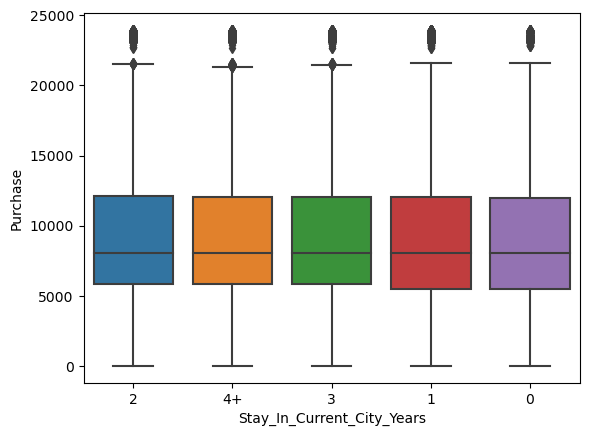

In [97]:
sns.boxplot(x = df['Stay_In_Current_City_Years'], y = df['Purchase'])

It can be seen that, Staying Period is not impacting the purchase result that much.

> ### **MARITAL STATUS**

In [99]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

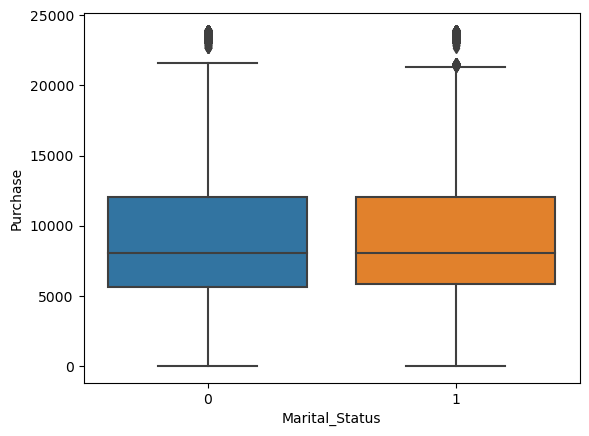

In [101]:
sns.boxplot(x = df['Marital_Status'], y = df['Purchase'])

In [114]:
df_s = df.loc[df['Marital_Status'] == 0]
df_m = df.loc[df['Marital_Status'] == 1]

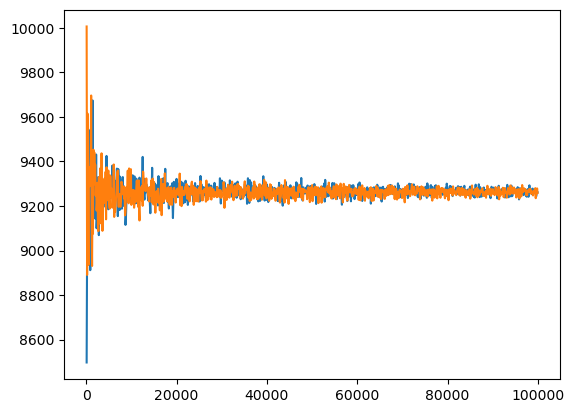

In [115]:
multi_size(df_s)
fig1 = plt.plot(size_list, mean_list)
multi_size(df_m)
fig2 = plt.plot(size_list, mean_list)
#plt.legend()

So, as we can see that the mean for both the categories lies on the same value approximately.

**SINGLES**

<AxesSubplot:ylabel='Count'>

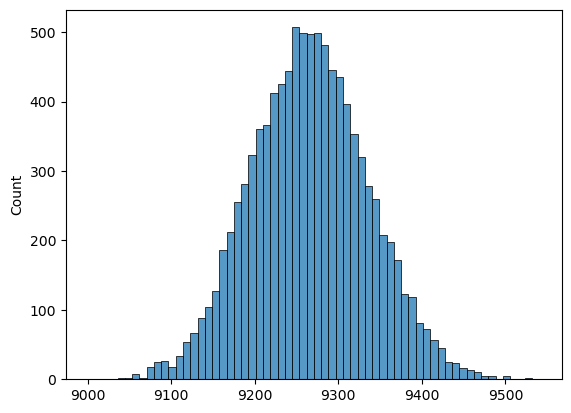

In [119]:
multi_trial(df_s)
sns.histplot(list_mean)

#### CONFIDENCE INTERVAL

In [120]:
data_mean = np.mean(list_mean)
data_std = np.std(list_mean)
print('data_mean = ',data_mean,'\n','data_std = ',data_std)
CI(95,data_mean,data_std)

data_mean =  9265.4836742 
 data_std =  70.19930902867549


'So, the 95 % Confidence Interval is [(9127.9, 9403.07)]'

**MARRIED POEPLE**

<AxesSubplot:ylabel='Count'>

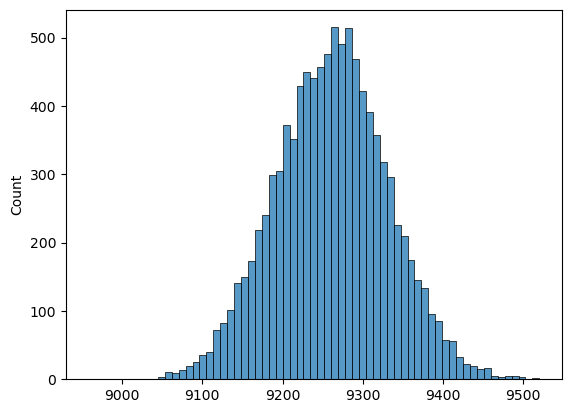

In [117]:
multi_trial(df_m)
sns.histplot(list_mean)

#### CONFIDENCE INTERVAL

In [118]:
data_mean = np.mean(list_mean)
data_std = np.std(list_mean)
print('data_mean = ',data_mean,'\n','data_std = ',data_std)
CI(95,data_mean,data_std)

data_mean =  9261.10935486 
 data_std =  70.09218222817931


'So, the 95 % Confidence Interval is [(9123.73, 9398.49)]'

Its almost completely overlapping. So, it's not possible to predict which category has the higher Purchase value.

> ### **PRODUCT CATEGORY**

In [124]:
df['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

<AxesSubplot:xlabel='Product_Category', ylabel='Purchase'>

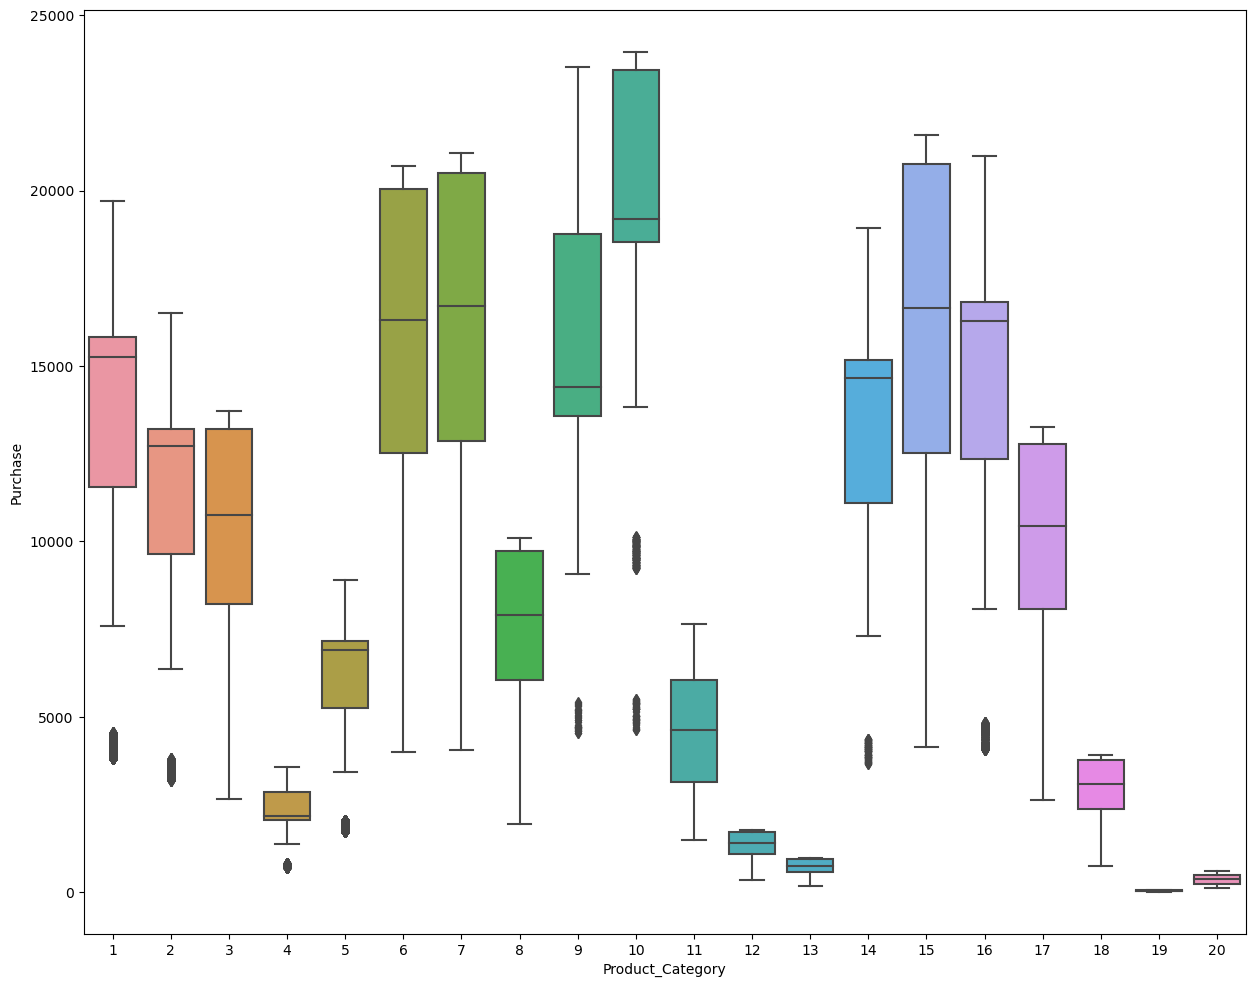

In [127]:
plt.figure(figsize=(15,12))
sns.boxplot(x=df['Product_Category'], y=df['Purchase'])

So, for the product category 6,7,9,10,15 have most purchase value. But the product categories like, 4,12,13,19,20, te purchase value is really low. So, the team should look onto these product categories, either increase the sale or remove it from the inventory of these category products.

> ### **INTER RELATIONS OF THE INDEPENDENT VARIABLES WITH THE TARGET VARIABLE**

In [122]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<AxesSubplot:>

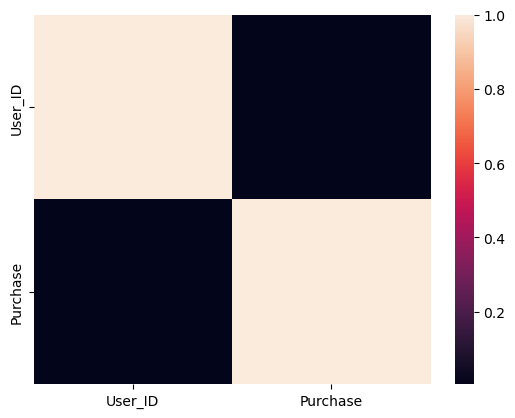

In [121]:
df_cor = df.corr()
sns.heatmap(df_cor)